In [1]:
#Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Данные

Описание датасета можно посмотреть тут: https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction/data

In [2]:
telcom = pd.read_csv("./Telco.csv")
telcom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...  DeviceProtection  \
0  No phone service             DSL             No  ...                No   
1                No             DSL            Yes  ...               Yes   
2                No             DSL            Yes  ...                No   
3  No phone service             DSL            Yes  ...               Yes   
4                No     Fiber optic             No  ...                No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

## Посмотрим на наши данные поближе:

In [4]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   11

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


In [5]:
telcom.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
telcom["TotalCharges"] = telcom["TotalCharges"].fillna('missing')

In [7]:
mean_total_charges = np.mean(np.array([float(i) for i in telcom["TotalCharges"] if i != 'missing']))
mean_total_charges

2283.300440841866

In [8]:
telcom["TotalCharges"] = telcom["TotalCharges"].replace("missing",mean_total_charges)

In [9]:
telcom.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

# Обработка категориальных признаков:

In [11]:
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 5].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

print('Категориальные признаки:',  *cat_cols, sep='\n')
print()
print('Числовые признаки:',  *num_cols, sep='\n')

Категориальные признаки:
gender
SeniorCitizen
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod

Числовые признаки:
tenure
MonthlyCharges
TotalCharges


In [12]:
telcom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...   DeviceProtection  \
0  No phone service             DSL             No  ...                 No   
1                No             DSL            Yes  ...                Yes   
2                No             DSL            Yes  ...                 No   
3  No phone service             DSL            Yes  ...                Yes   
4                No     Fiber optic             No  ...                 No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

## Посмотрим на статистики и визуализируем что-нибудь:

In [13]:
telcom.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2265.000258
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1400.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

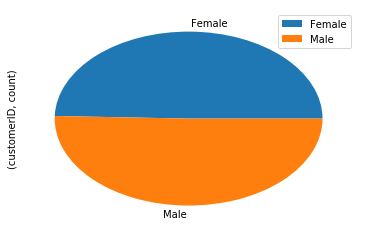

In [14]:
telcom[['gender', 'customerID']].groupby(['gender']).agg(['count']).plot.pie(subplots=True);

In [15]:
telcom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...   DeviceProtection  \
0  No phone service             DSL             No  ...                 No   
1                No             DSL            Yes  ...                Yes   
2                No             DSL            Yes  ...                 No   
3  No phone service             DSL            Yes  ...                Yes   
4                No     Fiber optic             No  ...                 No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [16]:
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"

telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),axis = 1)

In [17]:
telcom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity      ...      TechSupport  \
0  No phone service             DSL             No      ...               No   
1                No             DSL            Yes      ...               No   
2                No             DSL            Yes      ...               No   
3  No phone service             DSL            Yes      ...              Yes   
4                No     Fiber optic             No      ...               No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  tenure_group  
0           Electronic check          29.85        29.85     No   Tenure_0-12  
1               Mailed check          56.95      1889.50     No  Tenure_24-48  
2               Mailed check          53.85       108.15    Yes   Tenure_0-12  
3  Bank transfer (automatic)          42.30      1840.75     No  Tenure_24-48  
4           Electronic check          70.70       151.65    Yes   Tenure_0-12  

[5 rows x 22 columns]

Text(0,0.5,'The total amount charged to the customer')

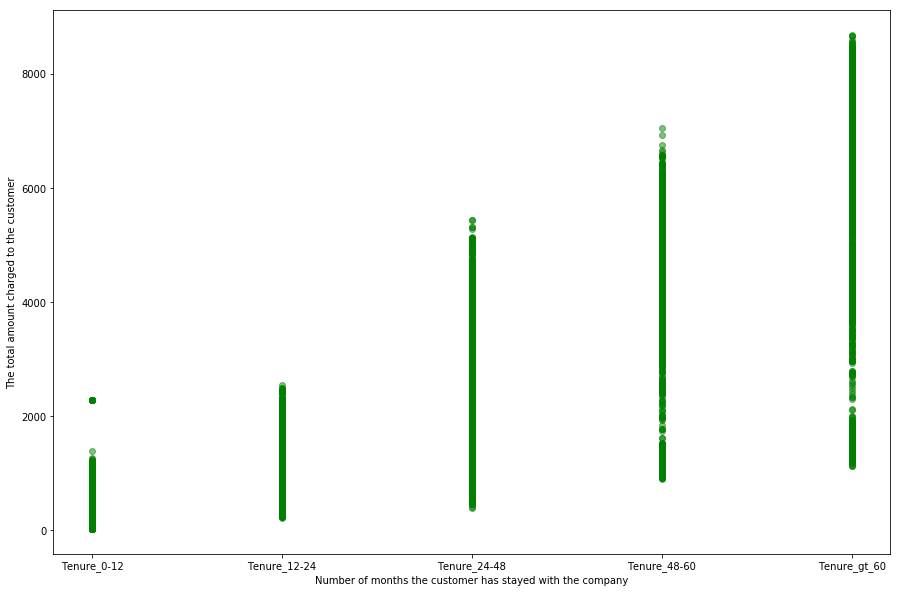

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(telcom.tenure_group, telcom.TotalCharges, c="g", alpha=0.5)
plt.xlabel("Number of months the customer has stayed with the company")
plt.ylabel("The total amount charged to the customer")

Text(0,0.5,'Customer Monhtly Charges')

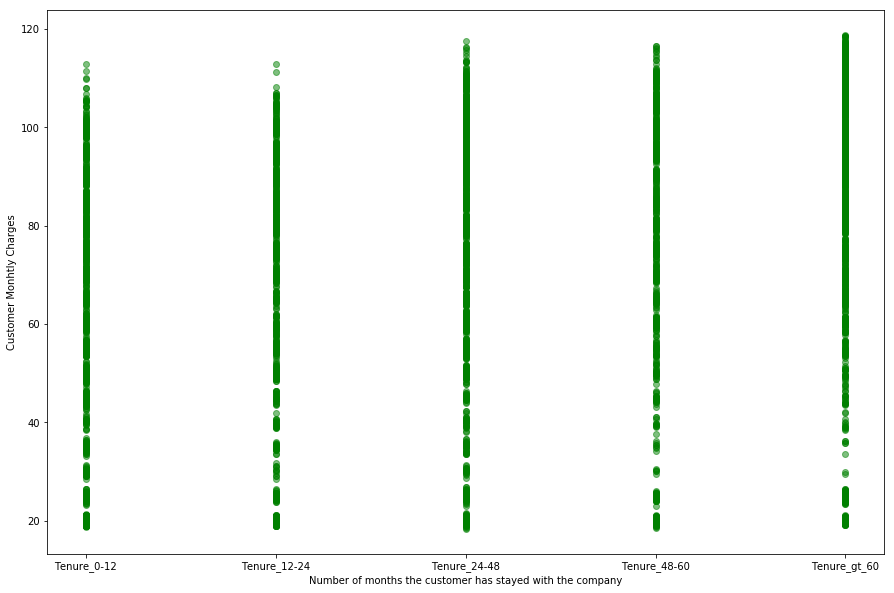

In [19]:
plt.figure(figsize=(15,10))
plt.scatter(telcom.tenure_group, telcom.MonthlyCharges, c="g", alpha=0.5)
plt.xlabel("Number of months the customer has stayed with the company")
plt.ylabel("Customer Monhtly Charges")

In [20]:
churn = telcom[telcom["Churn"] == 'Yes']
not_churn = telcom[telcom["Churn"] == 'No']

tg_ch  =  churn["tenure_group"].value_counts().reset_index()
tg_ch.columns  = ["tenure_group","count"]
tg_nch =  not_churn["tenure_group"].value_counts().reset_index()
tg_nch.columns = ["tenure_group","count"]

In [21]:
tg_ch

tenure_group  count
0   Tenure_0-12   1037
1  Tenure_24-48    325
2  Tenure_12-24    294
3  Tenure_48-60    120
4  Tenure_gt_60     93

In [22]:
tg_nch

tenure_group  count
0  Tenure_gt_60   1314
1  Tenure_24-48   1269
2   Tenure_0-12   1149
3  Tenure_12-24    730
4  Tenure_48-60    712

In [23]:
churn["tenure_group"].value_counts().reset_index()

index  tenure_group
0   Tenure_0-12          1037
1  Tenure_24-48           325
2  Tenure_12-24           294
3  Tenure_48-60           120
4  Tenure_gt_60            93

In [24]:
churn_stat = pd.DataFrame({"tenure_group": np.array(tg_ch.tenure_group), "churn": np.array(tg_ch['count']),
                          "not churn": np.array(tg_nch['count'])})
churn_stat

churn  not churn  tenure_group
0   1037       1314   Tenure_0-12
1    325       1269  Tenure_24-48
2    294       1149  Tenure_12-24
3    120        730  Tenure_48-60
4     93        712  Tenure_gt_60

In [28]:
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf

In [29]:
data = [
  go.Histogram(
    histfunc = "sum",
    y = churn_stat.churn,
    x = churn_stat.tenure_group,
    name = "churn"
  ),
  go.Histogram(
    histfunc = "sum",
    y = churn_stat['not churn'],
    x = churn_stat.tenure_group,
    name = "not churn"
  )
]

py.iplot(data)

# Логистическая регрессия

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [30]:
data = pd.read_csv("./Telco.csv")

data['TotalCharges'] = data["TotalCharges"].replace(" ",mean_total_charges)
data['TotalCharges'] = data['TotalCharges'].astype(float)

data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...   DeviceProtection  \
0  No phone service             DSL             No  ...                 No   
1                No             DSL            Yes  ...                Yes   
2                No             DSL            Yes  ...                 No   
3  No phone service             DSL            Yes  ...                Yes   
4                No     Fiber optic             No  ...                 No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

encoder = LabelEncoder()
for i in bin_cols :
    data[i] = encoder.fit_transform(data[i])
    
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

In [32]:
data.head()

customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0  7590-VHVEG       0              0        1           0             0   
1  5575-GNVDE       1              0        0           0             1   
2  3668-QPYBK       1              0        0           0             1   
3  7795-CFOCW       1              0        0           0             0   
4  9237-HQITU       0              0        0           0             1   

   PaperlessBilling  Churn  MultipleLines_No  MultipleLines_No phone service  \
0                 1      0                 0                               1   
1                 0      0                 1                               0   
2                 1      1                 1                               0   
3                 0      0                 0                               1   
4                 1      1                 1                               0   

       ...       Contract_Month-to-month  Contract_One year  \
0      ...                             1                  0   
1      ...                             0                  1   
2      ...                             1                  0   
3      ...                             0                  1   
4      ...                             1                  0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  0                                        0   
1                  0                                        0   
2                  0                                        0   
3                  0                                        1   
4                  0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check    tenure  MonthlyCharges  TotalCharges  
0                           0 -1.277445       -1.160323     -0.994971  
1                           1  0.066327       -0.259629     -0.173876  
2                           1 -1.236724       -0.362660     -0.960399  
3                           0  0.514251       -0.746535     -0.195400  
4                           0 -1.236724        0.197365     -0.941193  

[5 rows x 42 columns]

In [33]:
target = data.Churn

data.drop(columns=['Churn', 'customerID'], inplace=True)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
preds = LR.predict(X_test)
preds[:3]

array([1, 0, 0])

In [36]:
probas = LR.predict_proba(X_test)
probas[:3]

array([[0.33594681, 0.66405319],
       [0.93407036, 0.06592964],
       [0.99532821, 0.00467179]])

In [37]:
probabilities = [i[0] for i in probas]

In [38]:
from sklearn.metrics import accuracy_score as accuracy, precision_score as precision, recall_score as recall, roc_auc_score as roc_auc 

print('accuracy:', accuracy(y_test, preds))
print('precision:', precision(y_test, preds))
print('recall:', recall(y_test, preds))
print('ROC AUC:', roc_auc(y_test,probabilities))

accuracy: 0.8172043010752689
precision: 0.6890130353817505
recall: 0.589171974522293
ROC AUC: 0.13932041932372227


In [39]:
probabilities = [i[1] for i in probas]
print('ROC AUC:', roc_auc(y_test,probabilities))

ROC AUC: 0.8606795806762778


## Добавим кросс-валидацию:

In [40]:
from sklearn.cross_validation import cross_val_score, cross_val_predict

scores = cross_val_score(LR, data, target, cv=6)
scores

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



array([0.79744681, 0.80510638, 0.7955707 , 0.80306905, 0.80477408,
       0.80733163])

In [41]:
predictions = cross_val_predict(LR, data, target, cv=6)
predictions[:3]

array([1, 0, 0])

In [42]:
print('accuracy:', accuracy(target, predictions))

accuracy: 0.8022149652136874


In [43]:
predictions = LR.predict(data)
print('accuracy:', accuracy(target, predictions))

accuracy: 0.8064745137015477


In [44]:
for i in range(2, 8):
    predictions = cross_val_predict(LR, data, target, cv=i)
    print('k = ', i, end = ', ')
    print('accuracy:', accuracy(target, predictions), end = ', ')
    print('precision:', precision(target, predictions), end = ', ')
    print('recall:', recall(target, predictions))

k =  2, accuracy: 0.802072980264092, precision: 0.6525369299935774, recall: 0.5436062065275549
k =  3, accuracy: 0.8044867244072128, precision: 0.6576923076923077, recall: 0.5489566613162119
k =  4, accuracy: 0.8036348147096408, precision: 0.6551724137931034, recall: 0.5489566613162119
k =  5, accuracy: 0.8039187846088315, precision: 0.6552162849872774, recall: 0.5510968432316747
k =  6, accuracy: 0.8022149652136874, precision: 0.6517857142857143, recall: 0.5468164794007491
k =  7, accuracy: 0.8030668749112594, precision: 0.6535031847133758, recall: 0.5489566613162119


# KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
preds[:3]

array([1, 0, 0])

In [46]:
probas = knn.predict_proba(X_test)
probabilities = [i[1] for i in probas]
probabilities[:3]

[0.6666666666666666, 0.0, 0.0]

In [47]:
print('accuracy:', accuracy(y_test, preds))
print('precision:', precision(y_test, preds))
print('recall:', recall(y_test, preds))
print('ROC AUC:', roc_auc(y_test, probabilities))

accuracy: 0.7509677419354839
precision: 0.5398373983739837
recall: 0.5286624203821656
ROC AUC: 0.7507150122546721


## Добавим подбор гиперпараметров:

In [48]:
from sklearn.model_selection import GridSearchCV

n_neighbors = list(range(3,7))
algorithm = ['auto', 'ball_tree'] 

# Create hyperparameter options
hyperparameters = dict(n_neighbors=n_neighbors, algorithm=algorithm)
hyperparameters

{'algorithm': ['auto', 'ball_tree'], 'n_neighbors': [3, 4, 5, 6]}

In [49]:
clf = GridSearchCV(knn, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(data, target)

In [50]:
print('Best K:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best algorithm:', best_model.best_estimator_.get_params()['algorithm'])

Best K: 6
Best algorithm: auto


In [51]:
preds = best_model.predict(data)
probas = [i[1] for i in best_model.predict_proba(data)]
print('accuracy:', accuracy(target, predictions))
print('precision:', precision(target, predictions))
print('recall:', recall(target, predictions))
print('ROC AUC:', roc_auc(target, probas))

accuracy: 0.8030668749112594
precision: 0.6535031847133758
recall: 0.5489566613162119
ROC AUC: 0.8912934739963141


# SVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [52]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
preds = svm.predict(X_test)
preds[:3]

array([0, 0, 0])

In [53]:
print('accuracy:', accuracy(y_test, preds))
print('precision:', precision(y_test, preds))
print('recall:', recall(y_test, preds))

accuracy: 0.8034408602150538
precision: 0.6983758700696056
recall: 0.47929936305732485


Добавьте подбор гиперпараметров для SVM:

# Домашнее задание:


1. Скачайте данные соревнования: https://www.kaggle.com/c/bank-issues-1510/data
2. __(2 балла)__ Проведите стандартную предобработку: закодируйте категориальные признаки, проведите стандартизацию числовых. Признак living_region представлен строкой: можете либо удалить его, либо придумать, как преобразовать его в категорию. Заполните пропуски в данных или удалите строки с пропусками (подсказка: это можно сделать с помощью метода dropna())
3. __(0.5 балла)__ Отделите целевую переменную - open_account_flag. 
4. __(3 балла)__ Постройте гистограммы или графики корреляции и исследуйте зависимость номер тарифа кредита и сумму кредита от пола/образования/профессии/возраста (можно выбрать любые 2-3 признака) клиента.
5. __(3 балла)__ Попробуйте обучить любые два из пройденных на семинаре алгоритма классификации: для каждого из методов подберите оптимальные гиперпараметры.
6. __(1.5 балла)__ Зафиксируйте лучшую модель и отправьте прогноз для тестовых данных на Kaggle. Пример того, как должен выглядеть файл с ответами, можно посмотреть в файле sampleSubmission.csv (также лежит на Kaggle).
